## Module 4: Data preprocessing
In the previous lesson, we discussed missing value treatment, which is one of the steps in data preprocessing. Now, we will learn some techniques for data transformation, another important step in preprocessing.

### Lesson 2: Data Transformation
- Data transformation refers to the process of converting data from one format, structure or representation into another. 
- One of the techniques in data transformation is to convert the categorical data into numerical format.

### Part 4.2.1  :  Working with categoric features
Let us first understand the types of categorical data:
- **Nominal Data:** 
    - Nominal data represent distinct categories or labels with no specific order or ranking among them. 
    - These categories are typically mutually exclusive.
    - Examples: colors (red, green, blue), countries (India, USA, France) etc.
    - Nominal data can be counted and we can find a mode, but you cannot perform arithmetic operations or calculate measures like the mean or median on nominal data.
- **Ordinal Data:**
    - Ordinal data also represent categories, but they have a specific order or ranking between them. 
    - Examples: Education levels (high school, bachelor's, master's), customer satisfaction ratings (very dissatisfied, somewhat dissatisfied, neutral, satisfied, very satisfied).

- One can perform basic mathematical operations like counting and finding modes on ordinal data. However, the central tendency measures (mean, median) may not always be meaningful.

## Sometimes data that is actually numeric can also appear to be categoric

- **Interval Data:**
    - Interval data represent numeric values may be reported as bins. 
    - For example, score on a test may be reported as 0-10, 10-20, 20-30 etc.
    - One can perform arithmetic operations like addition and subtraction on interval data. However, multiplication and division do not make sense. We can calculate measures like the mean and standard deviation.
- **Ratio Data:**
    - Ratio data is defined as quantitative data, having the same properties as interval data, with an equal and definitive ratio between each data and absolute “zero” being treated as a point of origin. In other words, there can be no negative numerical value in ratio data.
    - Ratios between values have a meaningful interpretation.
    - Examples: Height, weight, age, income, distance, time (in seconds).
    - We can perform all mathematical operations (addition, subtraction, multiplication, division) on ratio data. We can calculate meaningful measures like the mean, median, standard deviation, and meaningful ratios (e.g., income ratios).
        
- Understanding the data type of the variables is crucial for selecting appropriate statistical techniques and understanding the nature of our data. 
- Nominal and ordinal data are often qualitative, while interval and ratio data are quantitative. 
- The choice of data type influences the types of analyses and visualizations that are most appropriate for our data.

#### Data transformation is a crucial step in the data preprocessing pipeline
- It helps improve the quality, usability, and compatibility of data for analysis, modeling, and decision-making. 
- Many analytical and machine learning algorithms require numerical input. Data transformation techniques like one-hot encoding or label encoding are used to convert categorical variables into numerical form, making them suitable for modeling.
- In some cases, data transformation is done for compliance and privacy reaons. Transformation techniques can be used to anonymize or mask data to comply with privacy regulations and protect sensitive information.

### Part 4.2.2  :  Transforming the features
- In this lecture, we will discuss the concept of **binning** and **discretization** of the attributes.
- Binning and discretization are data preprocessing techniques used to transform continuous or numerical data into discrete categories or intervals. 
- These techniques are often applied when you want to simplify data, reduce its dimensionality, or make it suitable for specific analysis or modeling methods.

#### Binning:
- Binning or bucketing, involves dividing a range of continuous values into smaller, discrete intervals or bins.
- Binning is useful for:
    - **Simplifying data:** Binning can simplify complex data by reducing the number of unique values and highlighting patterns within the data.
    - **Reducing noise:** It can help reduce the impact of outliers or extreme values by grouping them with nearby data points.
    - **Visualizations:** Binned data is often used for creating histograms, bar charts, or other visualizations to show the distribution of values.
- Types of Binning:
    - **Equal Width Binning:** Divide the data range into bins of equal width. This approach is straightforward but may not work well if the data distribution is skewed.
    - **Equal Frequency Binning:** Create bins such that each bin contains approximately the same number of data points. This can be useful for ensuring each category has a similar representation.
    - **Custom Binning:** Define bins based on domain knowledge or specific requirements. This allows for more flexibility in bin creation.
    
    
#### Discretization:
- Discretization is the process of converting continuous data into discrete values or categories. 
- Unlike binning, discretization may not necessarily involve equal-width or equal-frequency intervals.
- Discretization is useful for:
    - **Making data suitable for algorithms:** Some machine learning algorithms, such as decision trees and association rule mining, work better with discrete data.
    - **Handling assumptions:** Discretization can help meet the assumptions of certain statistical tests or models that require categorical data.
    - **Interpretability:** Discretized data can be more interpretable and easier to communicate to non-technical audiences.
- Few methods of discretization:
    - **Fixed Width Discretization:** Similar to equal-width binning, you define fixed-width intervals, and data points are assigned to the appropriate interval based on their values.
    - **Quantile-Based Discretization:** Data points are assigned to intervals based on percentiles, such as quartiles or quintiles.
    - **Domain-Based Discretization:** Experts or domain knowledge can guide the definition of categories or thresholds based on the context of the data.
    

**NOTE:**
- Binning and discretization are sometimes used interchangeably because they both involve converting continuous data into discrete categories or intervals. However, discretization is a broad term that encompasses various techniques for converting continuous data into discrete values or categories.
- Discretization methods can include not only binning but also other techniques like quantization, clustering, or encoding continuous values as categorical variables.
- Discretization methods can be based on statistical considerations, machine learning algorithms (e.g., k-means clustering for discretization), or domain-specific knowledge.

In [1]:
# Import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

#### Bin the *Page_traffic* column
- As we have seen earlier, the *Page_traffic* has huge variation.
- So, let us bin this continuous numerical variable into 5 different bins and visualize the data.

In [2]:
# read the version of the data where missing values are treated
pos_data=pd.read_csv('POS_Filled_Data.csv',index_col=[0])
pos_data.head()

,SKU ID,Date,Manufacturer,Sector,Category,Segment,Brand,Revenue($),Units_sold,Page_traffic
0,SKU1029,05-01-21,Synergix solutions,Oral Care,Toothpaste,Whitening Toothpaste,Close-up,0,0,0.0
1,SKU1054,05-08-21,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Tom's of Maine,0,0,0.0
2,SKU1068,01-08-22,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Himalaya Herbals,0,0,0.0
3,SKU1056,11-05-22,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Tom's of Maine,0,0,0.0
4,SKU1061,12-10-22,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Himalaya Herbals,0,0,0.0


We'll use the pandas function `pd.qcut()` to do the binning

In [3]:
# doing the binning
pos_data['Page_traffic_bin'] = pd.qcut(pos_data['Page_traffic'], \
                                       q = 5, precision = 0, duplicates = 'drop')
pos_data.sample(100).head()

,SKU ID,Date,Manufacturer,Sector,Category,Segment,Brand,Revenue($),Units_sold,Page_traffic,Page_traffic_bin
29875,SKU1298,11/27/2021,Synergix solutions,Beauty and Personal Care,Haircare,Shampoo,Dove,26779,1204,3542.0,"(2753.0, 3964.0]"
10625,SKU1198,05-07-22,Synergix solutions,Fabric Care,Fabric Softeners,Fabric_Liquid,Downy,25670,1553,3112.0,"(2753.0, 3964.0]"
30183,SKU1295,06-12-21,Synergix solutions,Beauty and Personal Care,Haircare,Shampoo,Dove,33521,1426,2393.0,"(734.0, 2753.0]"
20788,SKU1242,2/13/2021,Synergix solutions,Fabric Care,Laundry Detergents,Powder,Gain,26782,990,5429.0,"(3964.0, 10696.0]"
19731,SKU1250,1/30/2021,Synergix solutions,Fabric Care,Laundry Detergents,Powder,Gain,14900,812,2569.0,"(734.0, 2753.0]"


**Explanation:**
- We have created a new column to store the binned data.
- The pandas `qcut()` method is used to divide the column values into bins.
- We are dividing the values into 5 bins. 
- However, as there are many zeros in this column, the first bin will consists of only zeros and we will get bin ranges as (0,0] for the first bin. We need to use the *duplicates* parameter to drop such bins. 
- Since page traffic (number of visitors to the web page) should be an integer, we have made the bin boundaries to be integers by setting precision to zero.

In [4]:
# check the number of values in each bin
pos_data['Page_traffic_bin'].value_counts()

(-1.0, 734.0]        12474
(734.0, 2753.0]       6238
(2753.0, 3964.0]      6237
(3964.0, 10696.0]     6236
Name: Page_traffic_bin, dtype: int64

**Plot the bar graph of bins and the corresponding frequency**

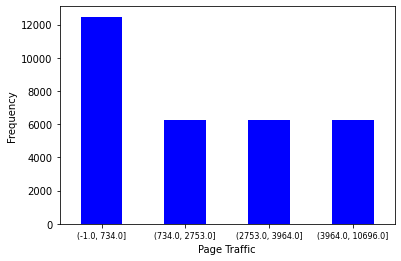

In [5]:
# plot the frequencies
ax = pos_data['Page_traffic_bin'].value_counts(sort = False).plot.bar(color = "b", figsize = (6,4))
plt.xticks(rotation = 0, fontsize = 8)
plt.xlabel('Page Traffic',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.show()

#### Discretize the *Page_traffic* column
- Sometimes we may not be interested in the actual number of visitors for the product page on the e-commerce website.
- Instead, we may want to understand whether the number of visitors is low, medium or high.
- So, let us discretize the *Page_traffic* column in to 3 levels: low, medium and high.

In [6]:
# turning the numeric data in discretized data
pos_data['Page_traffic_equal_bin']= pd.cut(pos_data['Page_traffic'], bins = 3, \
                                           labels = ['Low', 'Medium', 'High'])

In [7]:
pos_data.sample(1000).head()

,SKU ID,Date,Manufacturer,Sector,Category,Segment,Brand,Revenue($),Units_sold,Page_traffic,Page_traffic_bin,Page_traffic_equal_bin
10195,SKU1212,10/30/2021,Synergix solutions,Fabric Care,Fabric Softeners,Dryer Sheets,Bounce,19263,416,367.0,"(-1.0, 734.0]",Low
25574,SKU1388,11/20/2021,Synergix solutions,Beauty and Personal Care,Skincare,Suncreens,Cetaphil,0,0,0.0,"(-1.0, 734.0]",Low
19261,SKU1253,11/13/2021,Synergix solutions,Fabric Care,Laundry Detergents,Laundry_Liquid,Gain,19607,1430,3473.0,"(2753.0, 3964.0]",Low
1747,SKU1040,09-11-21,Synergix solutions,Oral Care,Toothpaste,Sensitivity Toothpaste,Colgate,19352,865,3471.0,"(2753.0, 3964.0]",Low
8848,SKU1207,10/16/2021,Synergix solutions,Fabric Care,Fabric Softeners,Fabric_Liquid,comfort,0,0,0.0,"(-1.0, 734.0]",Low


In [8]:
# check the number of valeus in each bin
pos_data['Page_traffic_equal_bin'].value_counts()

Low       22963
Medium     8068
High        154
Name: Page_traffic_equal_bin, dtype: int64

**NOTE:**
- We have converted the *Page_traffic* column into discrete form with 3 categorical values *Low, Medium* and *High*.
- The value of *bins* parameter is taken as 3 indicating we want to have 3 equal distribution of bins.
- This type of division makes sure that equal range of values have been put into each cateogry. 
- We have a lot of zeros in the *Page_traffic* column, resulting in a very high count for the *Low* category.


#### Illustration of choosing custom edges:
- Examine the distribution of 'Page_traffic' to understand its range and distribution.
- Based on the distribution and domain knowledge, let us define the edges as 0 (minimum as well as 25th percentile), 2000 (close to 50th percentile), and 4000 (close to 75th percentile), with the maximum value of 'Page_traffic' serving as the upper edge.

In [9]:
# summary statistics
pos_data['Page_traffic'].describe()

count    31185.000000
mean      2053.829695
std       1979.574340
min          0.000000
25%          0.000000
50%       1963.000000
75%       3647.000000
max      10696.000000
Name: Page_traffic, dtype: float64

In [10]:
# manually define the bin edges
bin_edges = [0, 2000, 4000, pos_data['Page_traffic'].max()]

In [11]:
# cut the data based on these edges
pos_data['Page_traffic_custom_bin'] = pd.cut(pos_data['Page_traffic'],\
                                              bins = bin_edges, labels = ['Low', 'Medium', 'High'],\
                                              include_lowest = True)

In [12]:
# look at a few rows of data
pos_data.sample(100).head()

,SKU ID,Date,Manufacturer,Sector,Category,Segment,Brand,Revenue($),Units_sold,Page_traffic,Page_traffic_bin,Page_traffic_equal_bin,Page_traffic_custom_bin
23041,SKU1349,5/14/2022,Synergix solutions,Beauty and Personal Care,Skincare,Anti-aging,Clinique,0,0,0.0,"(-1.0, 734.0]",Low,Low
8064,SKU1205,12-04-21,Synergix solutions,Fabric Care,Fabric Softeners,Fabric_Liquid,comfort,0,0,0.0,"(-1.0, 734.0]",Low,Low
2044,SKU1105,04-10-21,Synergix solutions,Oral Care,Toothbrushes,Kids Toothbrushes,Oral-B,0,0,0.0,"(-1.0, 734.0]",Low,Low
649,SKU1056,05-08-21,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Tom's of Maine,0,0,0.0,"(-1.0, 734.0]",Low,Low
15149,SKU1253,10-08-22,Synergix solutions,Fabric Care,Laundry Detergents,Laundry_Liquid,Gain,28543,1214,3542.0,"(2753.0, 3964.0]",Low,Medium


In [13]:
# check the frequencies
pos_data['Page_traffic_custom_bin'].value_counts()

Low       15703
Medium     9415
High       6067
Name: Page_traffic_custom_bin, dtype: int64

**We can see that 15703 records have *Page_traffic* between 0 and 2000, 9415 records fall into the range of 2000 to 4000 and 6067 records have *Page_traffic* above 4000**

### Part 4.2.3 : Encoding categoric features - part I
- Encoding categorical features into a numerical format is another essential part of data preprocessing.
- Most machine learning model require the data to be in numerical format.
- Some of the encoding techniques used to encode the categorical data are:
    - **One-hot encoding:**
        - Used for nominal data where categories have no inherent order
        - One-hot encoding converts each category into a binary vector where each category corresponds to a unique bit (0 or 1).
        - Example: Converting "Red," "Green," and "Blue" into [1, 0, 0], [0, 1, 0], and [0, 0, 1].
        - We can use `OneHotEncoder` from the package **sklearn.preprocessing** to implement one-hot encoding.
        - Alternatively, we can use `get_dummies()` from pandas.
    - **Label encoding:**
        - Used for ordinal data, where there is an inherent order among the categories
        - It involves mapping each category to a unique integer.
        - Example: Converting "Bad", "Average" and "Good" into 0, 1, and 2.
        - However, `LabelEncoder` converts the categories using some arbitrary order (mostly in alphabetical order values), and it cannot guarantee the meaning of the categories being maintained while numbering. For example, "Good" may be converted as 1, "Average" may be converted as 0 and "Bad" as 2. This may lead to the incorrect assumptions by the model, while building ML model.
    - **Ordinal encoding:**
        - To avoid the possible problem faced in label encoding, we can use ordinal encoding for ordinal data.
        - This technique ensures to maintain the hierarchy of the values in categorical variable.
        - `OrdinalEncoder` allows us to specify the unique values taken by the categorical variable and hence keeps the appropriate order.

**Let us create a simple dataset to demonstrate these 3 types of encoding**

In [14]:
# create an employee data with EmpID, Country, Skill and Performance
# Country is nominal data, Skill & Performance are ordinal data

data = {'EmpID': [121, 54, 78, 1245, 82],
        'Country':['India','USA', 'India','Canada','USA'],
        'Skill': ['Intermediate', 'Basic', 'Intermediate','Advanced', 'Intermediate'],
        'Performance': ['Low', 'Medium', 'High', 'Medium', 'Low']
       }
emp_data = pd.DataFrame(data)
emp_data

,EmpID,Country,Skill,Performance
0,121,India,Intermediate,Low
1,54,USA,Basic,Medium
2,78,India,Intermediate,High
3,1245,Canada,Advanced,Medium
4,82,USA,Intermediate,Low


#### Apply one-hot encoding through `get_dummies()` function on Country column

In [15]:
# apply one-hot encoding
emp_data = pd.get_dummies(emp_data,  columns=['Country'])
emp_data

,EmpID,Skill,Performance,Country_Canada,Country_India,Country_USA
0,121,Intermediate,Low,0,1,0
1,54,Basic,Medium,0,0,1
2,78,Intermediate,High,0,1,0
3,1245,Advanced,Medium,1,0,0
4,82,Intermediate,Low,0,0,1


- When we use `get_dummies()` on the *Country* column, binary vectors are created for each value *India*, *Canada* and *USA*. 
- The original column is replaced by 3 new columns.
- Obviously, the dimensionality of the data increases when we apply one-hot encoding.
- That is if there are n unique values in a nominal data column, n different columns get created, one for each possible value of the variable. For a given row, one of these columns will contains a 1 (corresponding to the value) and the rest will be zeros.
- We can use the parameter `drop_first = True` to reduce the dimension by 1. 

In [16]:
# one-hot encoding with drop_first
emp_data = pd.DataFrame(data)
emp_data = pd.get_dummies(emp_data,  columns=['Country'], drop_first = True)
emp_data

,EmpID,Skill,Performance,Country_India,Country_USA
0,121,Intermediate,Low,1,0
1,54,Basic,Medium,0,1
2,78,Intermediate,High,1,0
3,1245,Advanced,Medium,0,0
4,82,Intermediate,Low,0,1


#### Apply label encoding and ordinal encoding on Skill and Performance columns respectively

In [17]:
#import the required packages
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [18]:
# apply label encoding
LE = LabelEncoder()
emp_data['Skill'] = LE.fit_transform(emp_data['Skill'])
emp_data

,EmpID,Skill,Performance,Country_India,Country_USA
0,121,2,Low,1,0
1,54,1,Medium,0,1
2,78,2,High,1,0
3,1245,0,Medium,0,0
4,82,2,Low,0,1


***Explanation:***
- Note that the column Skill had 3 values *Basic, Intermediate, Advanced* and there is a clear order among these values.
- The mapping of these into numbers as {Basic:0,  Intermediate:1, Advanced:2} makes sense 
- But the label encoding has encoded them as: {Basic:1,  Intermediate:2, Advanced:0}, using alphabetical sequence, and thus by violating the meaning of these values. 
- Hence, one must be careful while using label encoding.

**Now, let us try ordinal encoding on Performance**

In [19]:
# OrdinalEncoder has an option to provide the order of categorical values 
# so that it can understand the appropriate relation
OE = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
emp_data['Performance'] = OE.fit_transform(emp_data[['Performance']])
emp_data

,EmpID,Skill,Performance,Country_India,Country_USA
0,121,2,0.0,1,0
1,54,1,1.0,0,1
2,78,2,2.0,1,0
3,1245,0,1.0,0,0
4,82,2,0.0,0,1


***Explanation:***
- It is clearly visible now that *Low, Medium, High* have been mapped as 0, 1 and 2 appropriately keeping the inherent order.

### Part 4.2.4 : Encoding categoric features - part II
- Let us try to implement the encoding techniques on the POS data.

In [20]:
# display the POS data on which have applied binning and discretization earlier
pos_data.head()

,SKU ID,Date,Manufacturer,Sector,Category,Segment,Brand,Revenue($),Units_sold,Page_traffic,Page_traffic_bin,Page_traffic_equal_bin,Page_traffic_custom_bin
0,SKU1029,05-01-21,Synergix solutions,Oral Care,Toothpaste,Whitening Toothpaste,Close-up,0,0,0.0,"(-1.0, 734.0]",Low,Low
1,SKU1054,05-08-21,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Tom's of Maine,0,0,0.0,"(-1.0, 734.0]",Low,Low
2,SKU1068,01-08-22,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Himalaya Herbals,0,0,0.0,"(-1.0, 734.0]",Low,Low
3,SKU1056,11-05-22,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Tom's of Maine,0,0,0.0,"(-1.0, 734.0]",Low,Low
4,SKU1061,12-10-22,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Himalaya Herbals,0,0,0.0,"(-1.0, 734.0]",Low,Low


**NOTE:**
- Earlier, we had applied different binning and discretization techniques *Page_traffic* column and created new columns.
- Let us keep only one column where equal width binning was used and data was discretized.
- Also, note that our POS data has a column called *Manufacturer* which has only one value 'Synergix solutions'. 
- When we preprocess the data for model building, attributes like this one which have only one value like do not contribute anything to the model. Hence, let us drop this column.

In [21]:
# drop some columns which we are not using right now
pos_data=pos_data.drop(['Manufacturer','Page_traffic','Page_traffic_bin','Page_traffic_custom_bin'], axis=1)
pos_data.head()

,SKU ID,Date,Sector,Category,Segment,Brand,Revenue($),Units_sold,Page_traffic_equal_bin
0,SKU1029,05-01-21,Oral Care,Toothpaste,Whitening Toothpaste,Close-up,0,0,Low
1,SKU1054,05-08-21,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Tom's of Maine,0,0,Low
2,SKU1068,01-08-22,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Himalaya Herbals,0,0,Low
3,SKU1056,11-05-22,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Tom's of Maine,0,0,Low
4,SKU1061,12-10-22,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Himalaya Herbals,0,0,Low


In [22]:
# check the data
pos_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31185 entries, 0 to 31184
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   SKU ID                  31185 non-null  object  
 1   Date                    31185 non-null  object  
 2   Sector                  31185 non-null  object  
 3   Category                31185 non-null  object  
 4   Segment                 31185 non-null  object  
 5   Brand                   31185 non-null  object  
 6   Revenue($)              31185 non-null  int64   
 7   Units_sold              31185 non-null  int64   
 8   Page_traffic_equal_bin  31185 non-null  category
dtypes: category(1), int64(2), object(6)
memory usage: 2.2+ MB


In [23]:
# select all columns that contain categorical data
categorical_columns = pos_data.select_dtypes(include=['object','category']).columns
print(list(categorical_columns))

['SKU ID', 'Date', 'Sector', 'Category', 'Segment', 'Brand', 'Page_traffic_equal_bin']


***Analysis to choose appropriate encoding for categorical columns:***
- Observe that the *Date* column is being shown as categorical because we haven't converted it to *datetime*. We will do this later.
- However, there are a few other attributes which need encoding.
- Out of these attributes, *Page_traffic_equal_bin* is ordinal data and we must apply ordinal encoding on this.
- However, 'SKU ID', 'Sector', 'Category', 'Segment' and 'Brand' are all nominal data.
- If we go by theory, we need to apply one-hot encoding for all these attributes.
- But, it will drastically increase the dimensionality of the data.

In [24]:
# count unique values
print("Number of unique values in SKU ID: ", len(pos_data['SKU ID'].unique()))
print("Number of unique values in Sector: ", len(pos_data['Sector'].unique()))
print("Number of unique values in Category: ", len(pos_data['Category'].unique()))
print("Number of unique values in Segment: ", len(pos_data['Segment'].unique()))
print("Number of unique values in Brand: ", len(pos_data['Brand'].unique()))

Number of unique values in SKU ID:  380
Number of unique values in Sector:  3
Number of unique values in Category:  7
Number of unique values in Segment:  19
Number of unique values in Brand:  23


- If we apply one-hot encoding on these columns, hundreds of additional columns would get created, which would lead to computational issues.
- It would be better to use label encoding, by arbitrarily numbering the values within each of these attributes.


**NOTE:**
- To reduce the dimensionality of the data, we may choose to go with label encoding, instead of one-hot encoding.
- However, machine learning models like the KNN algorithm, which uses the distance between two rows as the logic for predictive analysis, may not work well in such scenario. 
- So, while optimizing our decision on encoding, we must also be aware of the possible implications for future analyses.

**Now, let us apply label encoding on these columns:**

In [25]:
# do some imports
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
columns = ['SKU ID', 'Sector', 'Category', 'Segment', 'Brand']

In [26]:
# apply label encoding
LE = LabelEncoder()
for col in columns:
    pos_data[col] = LE.fit_transform(pos_data[col])
pos_data.head()

,SKU ID,Date,Sector,Category,Segment,Brand,Revenue($),Units_sold,Page_traffic_equal_bin
0,18,05-01-21,2,6,18,5,0,0,Low
1,43,05-08-21,2,6,9,21,0,0,Low
2,57,01-08-22,2,6,9,11,0,0,Low
3,45,11-05-22,2,6,9,21,0,0,Low
4,50,12-10-22,2,6,9,11,0,0,Low


In [27]:
# count unique values
print("Number of unique values in SKU ID: ", len(pos_data['SKU ID'].unique()))
print("Number of unique values in Sector: ", len(pos_data['Sector'].unique()))
print("Number of unique values in Category: ", len(pos_data['Category'].unique()))
print("Number of unique values in Segment: ", len(pos_data['Segment'].unique()))
print("Number of unique values in Brand: ", len(pos_data['Brand'].unique()))

Number of unique values in SKU ID:  380
Number of unique values in Sector:  3
Number of unique values in Category:  7
Number of unique values in Segment:  19
Number of unique values in Brand:  23


***Inference:***
- We can now see that all the nominal columns have been converted into numerical format.
- However, the unique numbers which have mapped the unique values remained the same.

**Apply ordinal encoding on the binned column Page_traffic:**

In [28]:
# apply ordinal encoding
OE = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
pos_data['Page_traffic_equal_bin'] = OE.fit_transform(pos_data[['Page_traffic_equal_bin']])

In [29]:
pos_data.sample(100).head()

,SKU ID,Date,Sector,Category,Segment,Brand,Revenue($),Units_sold,Page_traffic_equal_bin
17321,221,5/15/2021,1,2,14,0,16953,1367,0.0
131,41,7/24/2021,2,6,9,21,34240,1491,1.0
9663,194,3/27/2021,1,0,7,22,19855,1011,0.0
13409,259,5/21/2022,1,2,11,20,0,0,0.0
14945,226,8/21/2021,1,2,14,0,25572,1174,1.0


In [30]:
# check value counts
pos_data['Page_traffic_equal_bin'].value_counts()

0.0    22963
1.0     8068
2.0      154
Name: Page_traffic_equal_bin, dtype: int64

#### Convert the *Date* column into numerical format
- In our POS data, the *Date* column is of object/string type. 
- However, we have earlier converted into *datetime* type and did some good analysis based on month, year etc.
- But, when we preprocess the data for ML model building purpose, we need to convert *Date* also into a numeric format.
- A good way to convert the *Date* into numerical form is splitting the Day, Month and Year into 3 different columns.

In [31]:
#convert Date into datetime type
pos_data['Date'] = pd.to_datetime(pos_data['Date'])
pos_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31185 entries, 0 to 31184
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   SKU ID                  31185 non-null  int32         
 1   Date                    31185 non-null  datetime64[ns]
 2   Sector                  31185 non-null  int32         
 3   Category                31185 non-null  int32         
 4   Segment                 31185 non-null  int32         
 5   Brand                   31185 non-null  int32         
 6   Revenue($)              31185 non-null  int64         
 7   Units_sold              31185 non-null  int64         
 8   Page_traffic_equal_bin  31185 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(5), int64(2)
memory usage: 1.8 MB


In [32]:
#create three new columns to store day, month and year
pos_data['Day'] = pos_data['Date'].dt.day
pos_data['Month']  = pos_data['Date'].dt.month
pos_data['Year'] =  pos_data['Date'].dt.year

#drop the original Date column 
pos_data= pos_data.drop(['Date'], axis=1)
pos_data.head()

,SKU ID,Sector,Category,Segment,Brand,Revenue($),Units_sold,Page_traffic_equal_bin,Day,Month,Year
0,18,2,6,18,5,0,0,0.0,1,5,2021
1,43,2,6,9,21,0,0,0.0,8,5,2021
2,57,2,6,9,11,0,0,0.0,8,1,2022
3,45,2,6,9,21,0,0,0.0,5,11,2022
4,50,2,6,9,11,0,0,0.0,10,12,2022


In [33]:
#save this dataframe for later use
pos_data.to_csv('POS_EncodedData.csv', index=False)